In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display

In [2]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr, color='blue')
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

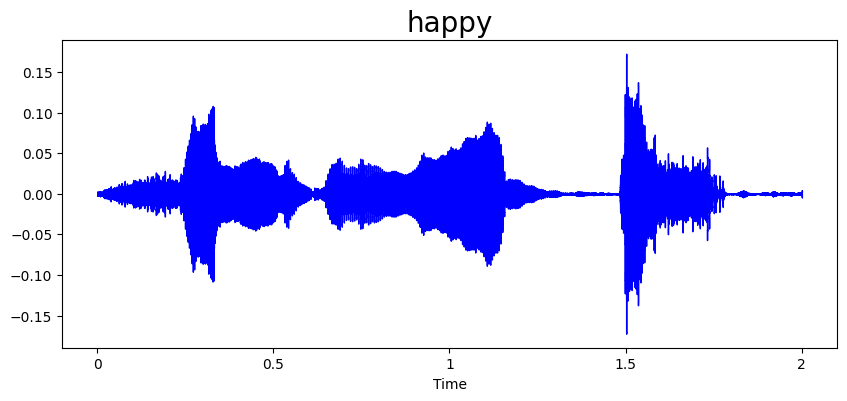

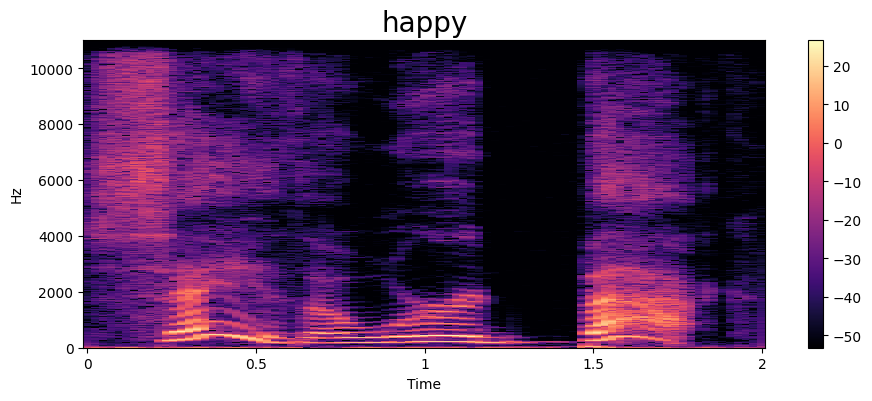

In [4]:
emotion = 'happy'
path = r"dataset\happy\OAF_back_happy.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

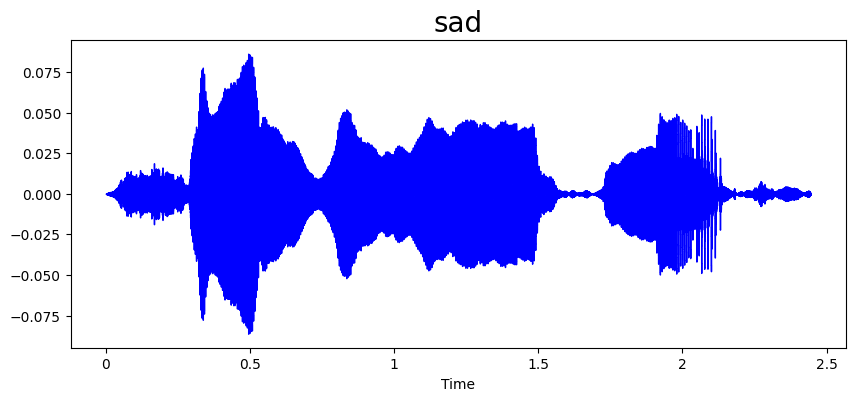

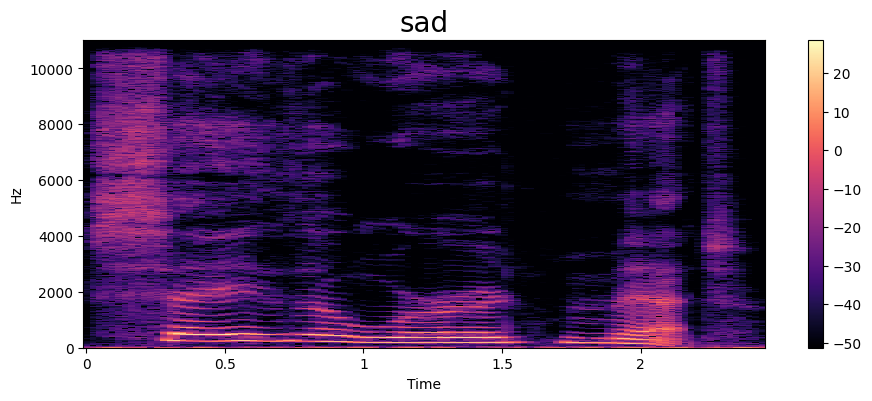

In [5]:
emotion = 'sad'
path = r"dataset\sad\OAF_met_sad.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

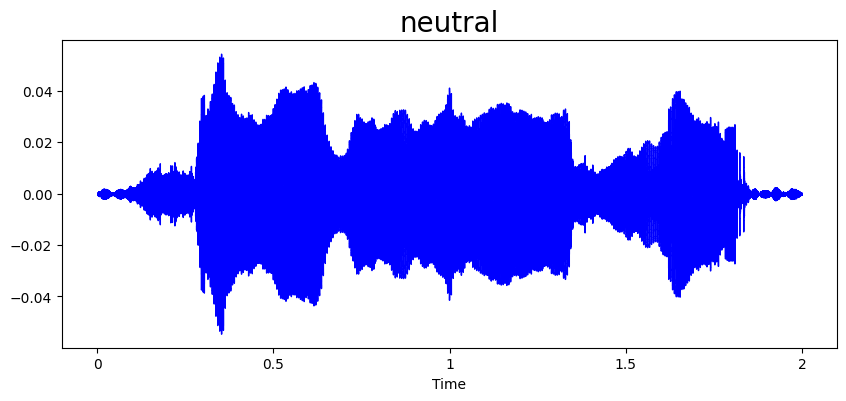

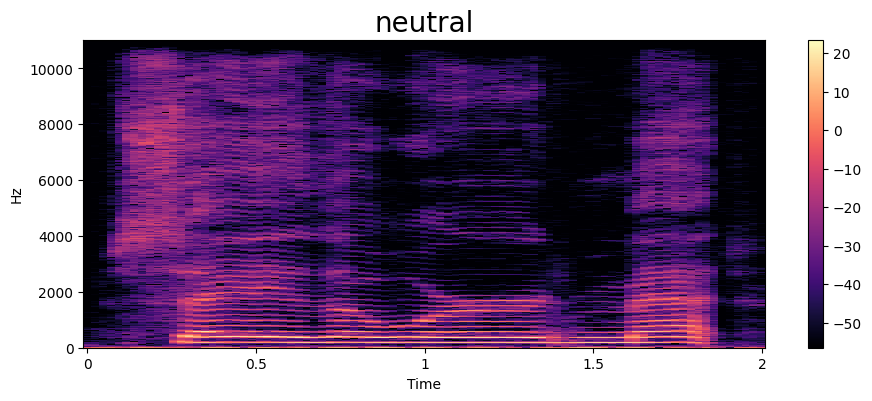

In [8]:
emotion = 'neutral'
path = r"dataset\neutral\OAF_met_neutral.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [10]:
def extract_features(file_path):
    audio_data, sr = librosa.load(file_path,duration=3.0)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=20)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed


In [11]:
def load_data_labels(data_dir):
    labels = []
    features = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        for file_name in os.listdir(label_dir):
            file_path = os.path.join(label_dir, file_name)
            feature = extract_features(file_path)
            if feature is not None:
                features.append(feature)
                labels.append(label)
    return np.array(features), np.array(labels)

In [113]:

data_dir = r'dataset'
X, y = load_data_labels(data_dir)

In [114]:
X[0:5], type(X)

(array([[-6.1766492e+02,  7.2745651e+01, -5.1431632e+00,  1.4449508e+01,
          4.8222809e+00, -3.4158630e+00, -6.6077151e+00, -7.7025318e+00,
         -1.3364720e+01, -2.8036408e+00, -1.5462345e+00, -7.9057260e+00,
          1.3084962e+00, -5.4466414e+00, -2.8385844e+00,  2.4481125e+00,
         -9.2852936e+00, -3.3463540e+00, -2.8629465e+00, -3.0023303e+00],
        [-5.5187054e+02,  5.1357048e+01, -2.5968742e+01,  9.8614273e+00,
         -8.6007442e+00, -7.6937661e+00, -5.7733603e+00, -1.5616198e+01,
         -5.4697027e+00, -4.1101508e+00, -6.6549268e+00, -3.2464559e+00,
         -1.0166168e+01, -9.8687935e-01, -6.5400338e+00, -4.4772444e+00,
         -2.7863042e+00, -1.9310685e+00, -3.7533121e+00,  1.1998644e+00],
        [-5.0904364e+02,  6.7902100e+01, -9.6342192e+00,  7.2105198e+00,
          3.4361825e+00, -1.8884767e+00, -1.8527725e+01, -1.1333910e+01,
         -9.7550497e+00, -1.3010103e+01,  3.2154040e+00, -8.0598230e+00,
         -5.9919224e+00, -3.2351654e+00, -7.30548

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [117]:
X[0:5]

array([[-1.3442008 ,  0.51174164, -0.69198024,  0.02149129,  0.2723833 ,
        -0.37474805,  0.00648806,  0.47584063, -0.8323786 , -0.08424796,
         1.4231315 , -1.2360656 ,  1.2865198 , -1.593348  , -0.3223502 ,
         0.91848165, -2.3197143 , -0.90477496,  0.05657659, -0.54292196],
       [-0.7206958 , -0.57772464, -1.81227   , -0.31236705, -1.1100557 ,
        -0.84345806,  0.14817336, -0.7607502 ,  0.28189474, -0.32802   ,
         0.41650197, -0.5801116 , -1.0619376 , -0.7267666 , -0.98518586,
        -0.63093895, -0.5868615 , -0.6574533 , -0.14335099,  0.6171525 ],
       [-0.3148436 ,  0.26502675, -0.93357176, -0.50526416,  0.12962885,
        -0.20739941, -2.0176988 , -0.09159919, -0.32292312, -1.9885964 ,
         2.3613765 , -1.25776   , -0.20761733, -1.1636337 , -1.1222593 ,
        -0.10742845, -1.3451176 , -1.0356754 , -0.21838443, -1.2760156 ],
       [-1.374349  , -0.51202726, -1.4829404 , -0.5510573 , -1.2020686 ,
        -1.1337975 , -0.42157325, -0.9173505 , -

In [116]:
X.shape

(1680, 20)

In [118]:
X = X.reshape(X.shape[0], X.shape[1], 1)
X = X.astype('float32')

In [119]:
X.shape

(1680, 20, 1)

In [120]:
y.shape

(1680,)

In [121]:
y1 = pd.Series(y)

In [122]:
print(y1.value_counts())

happy      592
sad        592
neutral    496
dtype: int64


In [123]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [124]:
X.shape

(1680, 20, 1)

In [125]:
y.shape

(1680,)

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [128]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

model=Sequential()
model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(20,1)))
model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(Conv1D(16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(Conv1D(8, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(Flatten())
# model.add(Dropout(0.3))

model.add(Dense(units=3 , activation='softmax'))


In [129]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 20, 32)            128       
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 10, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_17 (Conv1D)          (None, 10, 16)            1552      
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 5, 16)             0         
 ng1D)                                                           
                                                                 
 conv1d_18 (Conv1D)          (None, 5, 8)              392       
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 3, 8)             

In [130]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
42/42 [==============================] - 2s 8ms/step - loss: 1.0412 - accuracy: 0.5037
Epoch 2/10
42/42 [==============================] - 0s 6ms/step - loss: 0.9000 - accuracy: 0.6570
Epoch 3/10
42/42 [==============================] - 0s 6ms/step - loss: 0.7470 - accuracy: 0.7760
Epoch 4/10
42/42 [==============================] - 0s 7ms/step - loss: 0.6242 - accuracy: 0.8006
Epoch 5/10
42/42 [==============================] - 0s 5ms/step - loss: 0.5355 - accuracy: 0.8311
Epoch 6/10
42/42 [==============================] - 0s 5ms/step - loss: 0.4811 - accuracy: 0.8415
Epoch 7/10
42/42 [==============================] - 0s 5ms/step - loss: 0.4427 - accuracy: 0.8408
Epoch 8/10
42/42 [==============================] - 0s 5ms/step - loss: 0.4068 - accuracy: 0.8579
Epoch 9/10
42/42 [==============================] - 0s 6ms/step - loss: 0.3826 - accuracy: 0.8631
Epoch 10/10
42/42 [==============================] - 0s 5ms/step - loss: 0.3619 - accuracy: 0.8616


In [ ]:
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

In [132]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss: ',loss)
print('Test Accuracy: ', accuracy)


11/11 [==============================] - 0s 6ms/step - loss: 0.4188 - accuracy: 0.8304
Test Loss:  0.41882196068763733
Test Accuracy:  0.8303571343421936


## HPT

In [77]:
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# # Define the function to create the CNN model
# def create_model(filters_1, filters_2, filters_3, kernel_size, dropout_rate):
#     model = Sequential()
#     model.add(Conv1D(filters=filters_1, kernel_size=kernel_size, strides=1, padding='same', activation='relu', input_shape=(20, 1)))
#     model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
#     model.add(Conv1D(filters=filters_2, kernel_size=kernel_size, strides=1, padding='same', activation='relu'))
#     model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
#     model.add(Conv1D(filters=filters_3, kernel_size=kernel_size, strides=1, padding='same', activation='relu'))
#     model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
#     model.add(Flatten())
#     model.add(Dense(units=7, activation='softmax'))
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Create KerasClassifier
# model = KerasClassifier(build_fn=create_model, verbose=0)

# # Define hyperparameters grid
# param_grid = {
#     'filters_1': [16, 32,64],
#     'filters_2': [8,16, 32],
#     'filters_3': [4, 8,16],
#     'kernel_size': [3,4, 5],
# }

# # Perform grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid,, cv=3)
# grid.fit(X_train, y_train)

# # Print results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [134]:
y_pred = model.predict(X_test)

11/11 [==============================] - 0s 4ms/step


In [139]:
y_test

array([1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1,
       0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0,
       2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1,
       2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1,
       0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1,

In [140]:

y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1,
       0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2,
       2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1,
       2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2,
       0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1,
       0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1,

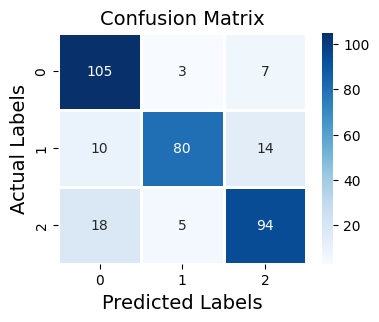

In [146]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (4, 3))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=14)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [65]:
model.save('sentiment_analysis_model_new.keras')
print('Model saved successfully!')

Model saved successfully!


In [66]:
np.save('label_encoder_classes_new.npy', label_encoder.classes_)


In [67]:
from keras.models import load_model

def load_saved_model(model_path):
    model = load_model(model_path)
    return model


In [69]:
def predict_sentiment(model, file_path, label_encoder):

    features = extract_features(file_path)
    if features is not None:

        features = features.reshape(1, 20, 1)

        prediction = model.predict(features)

        predicted_class = np.argmax(prediction)
        predicted_label = label_encoder.inverse_transform([predicted_class])[0]
        return predicted_label
    else:
        return None

In [70]:
def test_audio_files(model_path, audio_files):
    model = load_saved_model(model_path)

    label_encoder = LabelEncoder()
    label_encoder.classes_ = np.load('label_encoder_classes_new.npy', allow_pickle=True)

    for audio_file in audio_files:
        predicted_sentiment = predict_sentiment(model, audio_file, label_encoder)
        if predicted_sentiment is not None:
            print("Predicted sentiment for",audio_file,": ", predicted_sentiment)
        else:
            print("Failed to predict sentiment for ",audio_file)




In [71]:
model_path = r'sentiment_analysis_model_new.keras'
audio_files = [
                r'dataset\happy\OAF_moon_happy.wav',
                r'dataset\happy\OAF_nice_happy.wav',
                r"C:\Users\vinay\Downloads\WhatsApp+Audio+2024-03-16+at+16.19.20_out.wav"
              ] 
test_audio_files(model_path, audio_files)

1/1 [==============================] - 0s 248ms/step
Predicted sentiment for dataset\happy\OAF_moon_happy.wav :  happy
1/1 [==============================] - 0s 45ms/step
Predicted sentiment for dataset\happy\OAF_nice_happy.wav :  happy
1/1 [==============================] - 0s 47ms/step
Predicted sentiment for C:\Users\vinay\Downloads\WhatsApp+Audio+2024-03-16+at+16.19.20_out.wav :  happy
